# 4.
## Estudie el efecto túnel mirando la evolución temporal de un parque de ondas en un potencial de barrera.

Para distintos potenciales se puede usar el mismo metodo de funciones DVR para computar la evolución temporal de una particula en distintos potenciales. Por lo que aplicaremos exatamente el mismo codigo del punto 3 pero agregando Un pote3ncial escalon con un cierto ancho.

In [141]:
#Importamos librerías
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import integrate
from IPython.display import HTML

## Funciones a usar

In [142]:
#Funciones DVR
def f(x,n):
    fun_DVR = np.zeros(Nf)
    for k in range(Nf):
        fun_DVR = fun_DVR + (2/math.sqrt(L*(Nf+1)) * np.sin(((k+1)*math.pi*x)/L)*np.sin(((k+1)*n*math.pi)/(Nf+1)))
    return fun_DVR

#Definicion del paquete de ondas inicial.
def Psi_0_Gauss(x):
    gauss = np.exp(-(x-x0)**2/(2*sigma) + 1j*p0*x/hbar  )
    return gauss

#Solución analítica de la energía cinética en la base DVR
def  fiddfj(i,j):
    fiddfj_num = 0
    for k in range(Nf):
        fiddfj_num = fiddfj_num - 2*(math.pi)**2/((Nf+1)*L**2) \
                      * (k**2 * np.sin( i*k*math.pi/(Nf+1) )*np.sin(j*k*math.pi/(Nf+1) ) )
    return fiddfj_num

#Función de onda propagada para distintos paquetes de onda inicial.
def Psi_Gauss(tt):
    Psi = np.zeros(Nf)
    for l in range(Nf):
        Psi = Psi + cn_Ideal_Gauss[l]*(phin[:,l:l+1].T)[0]*np.exp(-1j*En[l]*(tt-t0))
    return Psi

#Definicion del potencial estacionario para cada punto, y otra funcion del mismo potencial para graficar.
def  V(i,j):
    Vij_num = dcroc(i,j)*np.where(np.abs(xvals[i] - (L/2+2)) <= 2, Ebar, 0)
    return Vij_num

def pot(x):
    return np.where(np.abs(x - (L/2+2)) <= 2, Ebar, 0)


#función de estado inicial de la animación
def init():
    line_module_Gauss.set_data([],[])           
    frame_text1.set_text('')
    return line_module_Gauss, frame_text1

#Función en la que vemos propagandose la función de onda.
def animate(frames):
    tt = (frames+1) * 0.1
    y1 = Psi_Gauss(tt) 

    line_module_Gauss.set_data(xvals, np.abs(y1)**2) 
    
    frame_text1.set_text(f"{frames}")
    return line_module_Gauss, frame_text1

#Funcion producto punto entre funciones y vectores.
def dot(dom,fun1,fun2):
    if sum(dom) != 0:
        inte = integrate.simpson(fun1*fun2,dom)
        return inte
    else:
        # SI estamos aqui es porque fun1 y fun2 se tratan de vectores
        dot_prod = np.sum(fun1*fun2)
        return dot_prod

#Definimos la funcion delta de croniquer
def dcroc(i, j):
    if i == j:
        return 1
    else:
        return 0

__Definición de parametros__

In [143]:
L = 20
Nf = 250
x0 = L/2-2
t0 = 0
Ebar = 2.6

hbar = 1
me = 1
sigma = 0.1
p0 = me*1.5

xvals = np.linspace(0,L,Nf)

__Definimos el desarrollo de la funcion de onda inicial en terminos de funciones DVR__

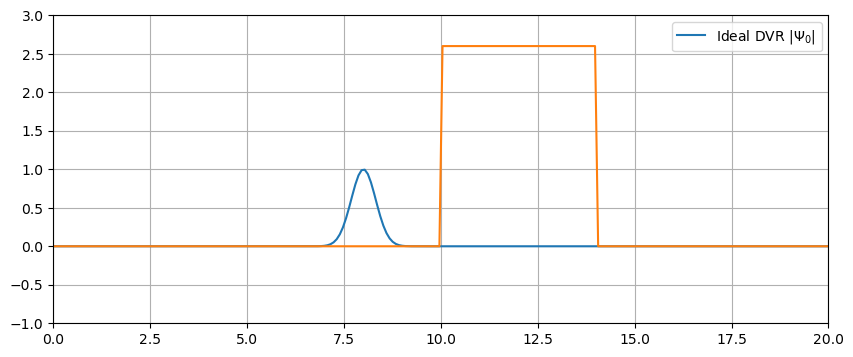

In [144]:
Ideal_Gauss = []


for i in range(1,Nf+1):
    Ideal_Gauss.append(math.sqrt(L/(Nf+1))*Psi_0_Gauss(i*L/(Nf+1)))


Ideal_Gauss = np.array(Ideal_Gauss)
phi_0_Gauss_IdealConsts =np.zeros(Nf)


for i in range(1,Nf+1):
    phi_0_Gauss_IdealConsts = phi_0_Gauss_IdealConsts + Ideal_Gauss[i-1]*f(xvals,i)

fig1,ax1, = plt.subplots(figsize=(10, 4))
ax1.set_xlim(0,L)
ax1.set_ylim(-1,3)

ax1.plot(xvals,np.abs(phi_0_Gauss_IdealConsts),label = f"Ideal DVR $|\Psi_0|$")
ax1.plot(xvals,pot(xvals))
ax1.grid(True)             
ax1.legend() 

Ahora definimos el Hamiltoniano. La ventaja que tiene el desarrollo de funciones DVR es su facilidad de cambio de casos para distintos potenciales estacionarios. por lo que solo basta agregar en la diagonal principal el potencial evaluado para cada punto DVR.

In [145]:
H = np.zeros((Nf,Nf))

for l in range(Nf):
    for m in range(Nf):
        H[l,m] = - hbar**2/(2*me) * fiddfj(l+1,m+1) + V(l,m)

Diagonalizamos para hallar los auto valores (Energias) y los autovectores.

In [146]:
En, bn = np.linalg.eig(H)
En = np.round(En,5)

idx = np.argsort(En)          
En = En[idx]                
bn = bn[:, idx]

__Teniendo las energias y los autovectores desarrollamos entonces la evolucion temporal buscando los autoestados y las constantes de probabilidad $C_{n}$__

In [147]:
phin = np.zeros((Nf,Nf))

for l in range(Nf):
    phinp = np.zeros((Nf,1))
    for m in range(Nf):
        phinp = phinp + bn[m,l]*np.array([f(xvals,m+1)]).T
    phin[:,l:l+1] = phinp/math.sqrt(dot(xvals,(phinp.T)[0],(phinp.T)[0]))


cn_Ideal_Gauss = []

for l in range(Nf): 
    cn_Ideal_Gauss.append(sum((bn[:,l:l+1].T)[0]*Ideal_Gauss))
 
cn_Ideal_Gauss = np.array(cn_Ideal_Gauss)

cn_Ideal_Gauss = cn_Ideal_Gauss/math.sqrt(dot([],np.abs(cn_Ideal_Gauss),np.abs(cn_Ideal_Gauss)))

__Ya con esto estamos listos para simular__

In [148]:
fig2,ax2 = plt.subplots(figsize=(10, 4))
ax2.set_xlim(0, L)
ax2.set_ylim(-0.3, 5)

ax2.plot(xvals,pot(xvals))

line_module_Gauss, = ax2.plot([], [], lw=2, color = 'blue',label= "Ideal")
ax2.grid(True)             
ax2.legend()

frame_text1 = ax2.text(0.02, 0.9, '', transform=ax2.transAxes, fontsize=12, color='red')

ani = animation.FuncAnimation(fig2, animate,init_func=init, frames=304, interval=70, blit=True)

plt.close(fig2)  
HTML(ani.to_jshtml())


[[-1.17045307e-02  1.97813417e-03]
 [-2.34817073e-02 -5.08574209e-04]
 [-3.46846718e-02  5.89403329e-03]
 [-4.61093852e-02 -1.09463896e-03]
 [-5.63937122e-02  9.69064595e-03]
 [-6.70601809e-02 -1.83206508e-03]
 [-7.60358790e-02  1.32944350e-02]
 [-8.55724566e-02 -2.78765011e-03]
 [-9.28908614e-02  1.66405553e-02]
 [-1.00973593e-01 -4.01798952e-03]
 [-1.06340109e-01  1.96757670e-02]
 [-1.12704542e-01 -5.56681618e-03]
 [-1.15889415e-01  2.23608160e-02]
 [-1.20340237e-01 -7.46293043e-03]
 [-1.21186962e-01  2.46721731e-02]
 [-1.23605105e-01 -9.71881566e-03]
 [-1.22036167e-01  2.66030512e-02]
 [-1.22383129e-01 -1.23300030e-02]
 [-1.18402861e-01  2.81636547e-02]
 [-1.16722080e-01 -1.52752143e-02]
 [-1.10416537e-01  2.93806495e-02]
 [-1.06831769e-01 -1.85172771e-02]
 [-9.83656249e-02  3.02958770e-02]
 [-9.30763888e-02 -2.20047692e-02]
 [-8.26869652e-02  3.09643729e-02]
 [-7.59612139e-02 -2.56743177e-02]
 [-6.39498610e-02  3.14517803e-02]
 [-5.61141532e-02 -2.94534472e-02]
 [-4.28352969e-02  3

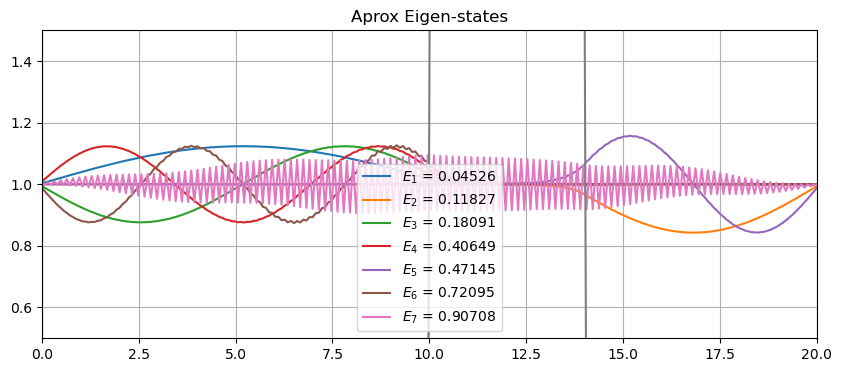

In [152]:
fig3,ax3 = plt.subplots(figsize=(10, 4))
ax3.set_xlim(0, L)
ax3.set_ylim(0.5, 1.5)

for l in range(7):
    ax3.plot(xvals,(bn[:,l:l+1].T)[0]+1, label= f"$E_{l+1}$ = {En[l]}")

ax3.plot(xvals,pot(xvals))

ax3.grid(True)
ax3.legend()
ax3.set_title("Aprox Eigen-states")
print(bn[:,5:7])